In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [4]:
ETH = pd.read_csv('ethereum_history.csv', index_col=0)
ETH.head()

,Date,Open,High,Low,Close,Volume,Market_Cap
0,"Mar 13, 2020",112.69,137.43,95.18,133.20,"27,864,623,061","14,663,417,618"
1,"Mar 12, 2020",194.74,195.15,111.21,112.35,"22,134,741,655","12,366,138,225"
2,"Mar 11, 2020",200.77,202.95,184.36,194.87,"16,984,790,291","21,446,678,546"
3,"Mar 10, 2020",202.86,205.71,198.06,200.77,"18,344,930,072","22,093,126,953"
4,"Mar 09, 2020",201.32,207.45,192.27,201.99,"23,645,428,606","22,224,520,906"


In [5]:
# there are no nulls
ETH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1680
Data columns (total 7 columns):
Date          1681 non-null object
Open          1681 non-null object
High          1681 non-null object
Low           1681 non-null object
Close         1681 non-null object
Volume        1681 non-null object
Market_Cap    1681 non-null object
dtypes: object(7)
memory usage: 105.1+ KB


In [6]:
# change the dtype from object to datetime64
ETH['Date'] = pd.to_datetime(ETH['Date'])

print(ETH['Date'].dtype)

datetime64[ns]


In [7]:
# extract year,month and day to new column
ETH['Year'] = ETH['Date'].dt.year

ETH['Month'] = ETH['Date'].dt.month

ETH['Day'] = ETH['Date'].dt.day

# delete date column from dataset
ETH = ETH.drop('Date', axis=1)

ETH.head()

,Open,High,Low,Close,Volume,Market_Cap,Year,Month,Day
0,112.69,137.43,95.18,133.20,"27,864,623,061","14,663,417,618",2020,3,13
1,194.74,195.15,111.21,112.35,"22,134,741,655","12,366,138,225",2020,3,12
2,200.77,202.95,184.36,194.87,"16,984,790,291","21,446,678,546",2020,3,11
3,202.86,205.71,198.06,200.77,"18,344,930,072","22,093,126,953",2020,3,10
4,201.32,207.45,192.27,201.99,"23,645,428,606","22,224,520,906",2020,3,9


In [8]:
# change data types as float
ETH['Volume'] = ETH['Volume'].str.replace(',', '').astype(float)

In [9]:
ETH['Open'] = ETH['Open'].str.replace(',', '').astype(float)

In [10]:
ETH['Market_Cap'] = ETH['Market_Cap'].str.replace(',', '').astype(float)

In [11]:
ETH['Low'] = ETH['Low'].str.replace(',', '').astype(float)

In [12]:
ETH['Close'] = ETH['Close'].str.replace(',', '').astype(float)

In [13]:
ETH['High'] = ETH['High'].str.replace(',', '').astype(float)

In [14]:
# check the dtypes
ETH.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market_Cap    float64
Year            int64
Month           int64
Day             int64
dtype: object

In [19]:
pt = ETH.pivot_table(index='Year', values=['Market_Cap', 'Volume'])
pt

,Market_Cap,Volume
Year,,
2015,6.855461e+07,8.199821e+05
2016,8.033392e+08,1.797756e+07
2017,2.116943e+10,7.432752e+08
2018,4.797184e+10,2.276869e+09
2019,1.941340e+10,6.967028e+09
2020,2.169188e+10,1.600464e+10


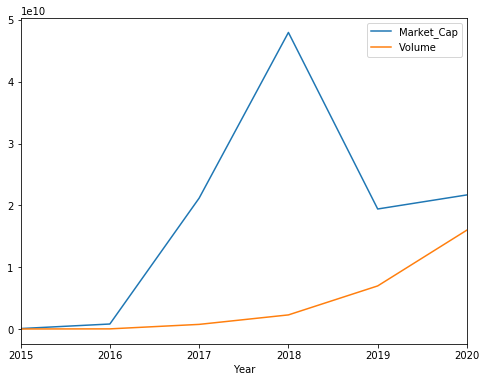

In [25]:
pt.plot(figsize=(8,6))

In [27]:
# change of market cap in years (bar graph)
#sns.catplot(x="Year", y="Market_Cap", kind='bar' , data=ETH);

In [26]:
# change of volume in years (line graph)
#sns.relplot(x='Year', y='Volume', kind='line', data=ETH);

In [15]:
# correlation between different variables
ETH.corr()

,Open,High,Low,Close,Volume,Market_Cap,Year,Month,Day
Open,1.000000,0.998615,0.996619,0.996579,0.206763,0.995751,0.392199,-0.159857,-0.001548
High,0.998615,1.000000,0.996623,0.998493,0.207329,0.997198,0.386255,-0.161777,-0.002192
Low,0.996619,0.996623,1.000000,0.998056,0.205747,0.997657,0.399308,-0.156531,-0.001337
Close,0.996579,0.998493,0.998056,1.000000,0.206732,0.999006,0.391191,-0.159411,-0.002280
Volume,0.206763,0.207329,0.205747,0.206732,1.000000,0.239696,0.763436,-0.161487,-0.003971
Market_Cap,0.995751,0.997198,0.997657,0.999006,0.239696,1.000000,0.423008,-0.161412,-0.002698
Year,0.392199,0.386255,0.399308,0.391191,0.763436,0.423008,1.000000,-0.262020,-0.027157
Month,-0.159857,-0.161777,-0.156531,-0.159411,-0.161487,-0.161412,-0.262020,1.000000,0.020352
Day,-0.001548,-0.002192,-0.001337,-0.002280,-0.003971,-0.002698,-0.027157,0.020352,1.000000


(9.0, 0.0)

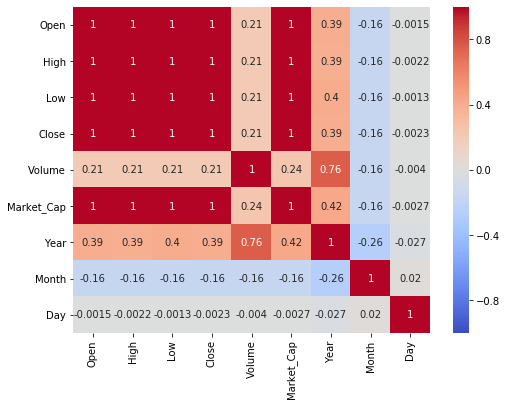

In [16]:
# fix the first and the last row cut in half of the heatmap plot
plt.figure(figsize=(8,6))
ax = sns.heatmap(ETH.corr(), annot=True, vmin=-1, vmax=1,  cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

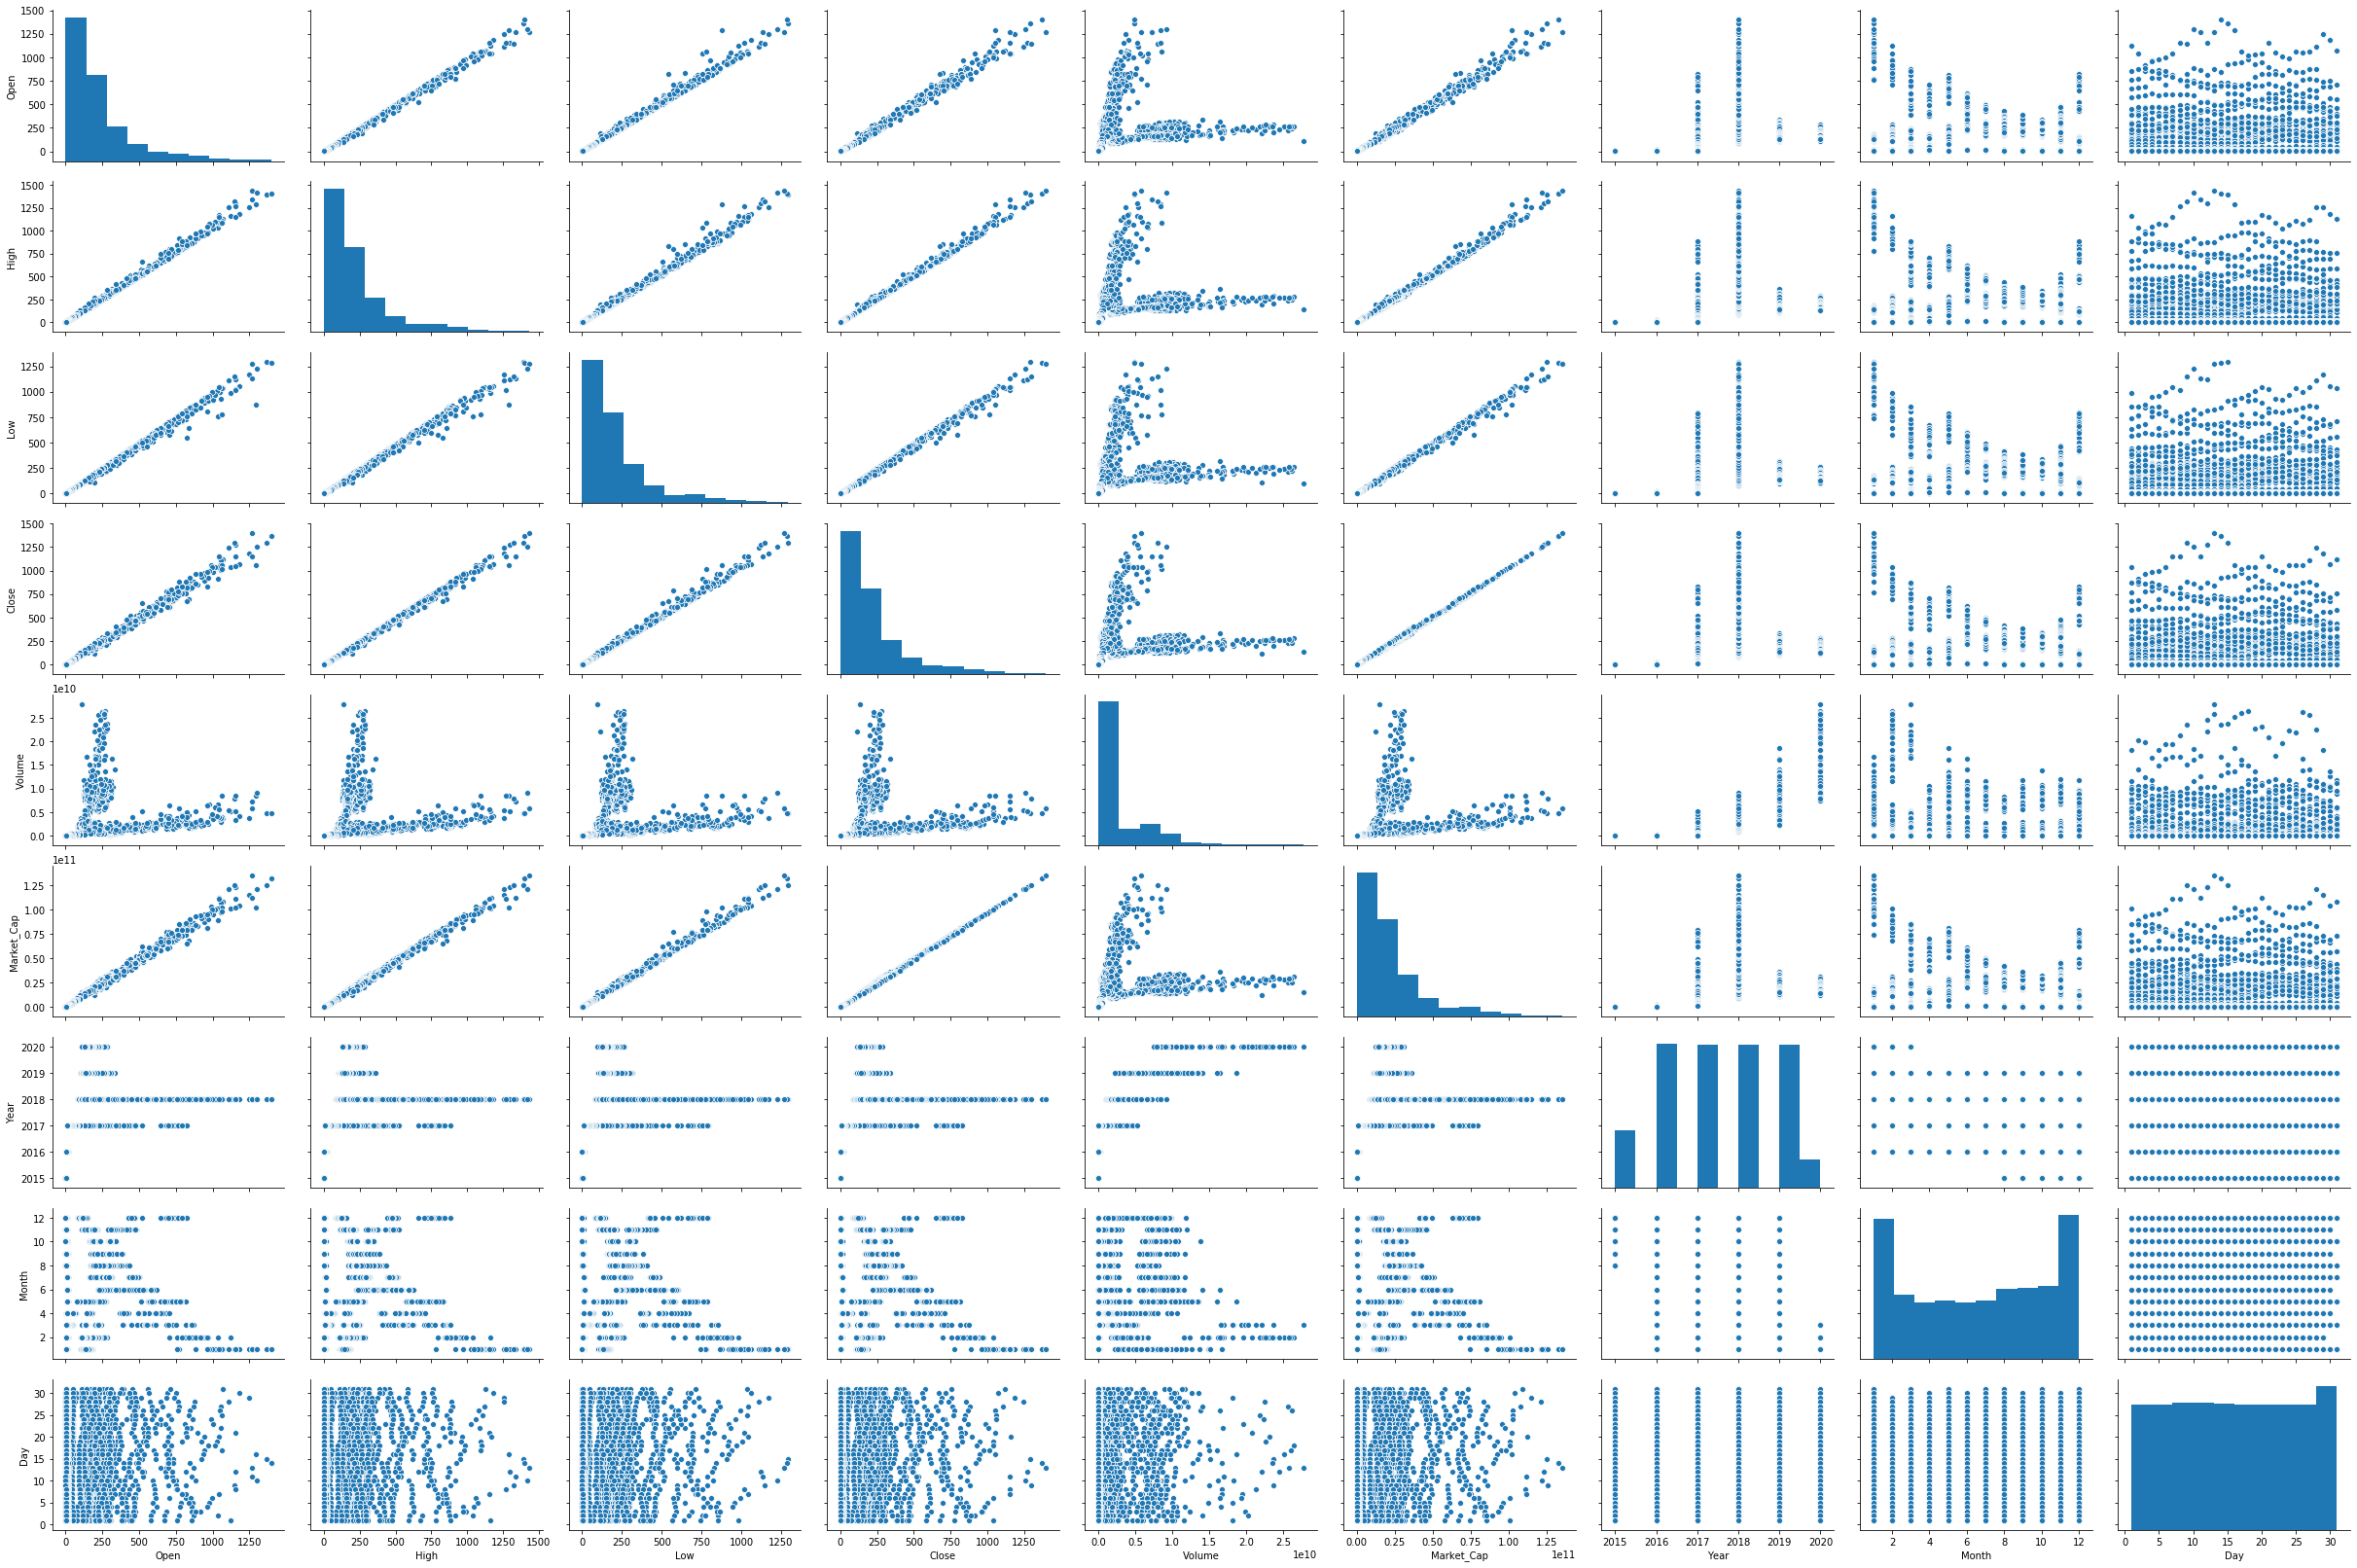

In [17]:
# plot all of the variable-to-variable relations as scatterplots
sns.pairplot(ETH, aspect=1.5);

In [18]:
# statsmodels.formula.api
# first OLS model
import statsmodels.formula.api as smf

lsm = smf.ols('Volume ~ Year + Close + Market_Cap', data=ETH)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1091.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:27:14   Log-Likelihood:                -38752.
No. Observations:                1681   AIC:                         7.751e+04
Df Residuals:                    1677   BIC:                         7.753e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.789e+12   1.56e+11    -17.859      0.000   -3.09e+12   -2.48e+12
Year        1.383e+09   7.74e+07     17.865      0.000    1.23e+09    1.54e+09
Close      -1.693e+08    9.1e+06    -18.599      0.000   -1.87e+08   -1.51e+08
Market_Cap     1.7355      0.094     18.394      0.000       1.550       1.921
==============================================================================
Omnibus:                      854.697   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8487.738
Skew:                           2.161   Prob(JB):                         0.00
Kurtosis:                      13.124   Cond. No.                     7.96e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# expanding Model
lsm = smf.ols('Volume ~ Year + Close + High + Low + Market_Cap', data=ETH)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     788.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:27:14   Log-Likelihood:                -38644.
No. Observations:                1681   AIC:                         7.730e+04
Df Residuals:                    1675   BIC:                         7.733e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.725e+12   1.47e+11    -18.589      0.000   -3.01e+12   -2.44e+12
Year        1.352e+09   7.27e+07     18.596      0.000    1.21e+09    1.49e+09
Close      -1.796e+08   1.03e+07    -17.494      0.000      -2e+08   -1.59e+08
High        3.583e+07   4.22e+06      8.500      0.000    2.76e+07    4.41e+07
Low        -5.356e+07   4.15e+06    -12.901      0.000   -6.17e+07   -4.54e+07
Market_Cap     1.9784      0.090     21.981      0.000       1.802       2.155
==============================================================================
Omnibus:                      834.992   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8117.345
Skew:                           2.105   Prob(JB):                         0.00
Kurtosis:                      12.908   Cond. No.                     7.96e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# train + valid + test
X, y = ETH[['Year', 'Close', 'Low','Market_Cap', 'High']], ETH['Volume']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [21]:
# X_train and y_train = %60 of the original
# X_cv and y_cv = %20 of the original
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size=.2, random_state=10)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()

# feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_cv.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=2)

# feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_cv.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()


In [29]:
lm.fit(X_train, y_train)

print(f'Linear Regression val R^2: {lm.score(X_cv, y_cv):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_cv):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_cv):.3f}')

Linear Regression val R^2: 0.705
Ridge Regression val R^2: 0.666
Degree 2 polynomial regression val R^2: 0.697


In [30]:
lm.fit(X,y)
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')


Linear Regression val R^2: 0.691


In [31]:
# cross-valid + test
from sklearn.model_selection import train_test_split,cross_val_score,KFold

kf = KFold(n_splits=5, shuffle=True, random_state = 100)
cross_val_score(lm, X, y, # estimator, features, target
                cv=kf, # number of folds
                scoring='r2') # scoring metric

array([0.66214305, 0.70794507, 0.69021057, 0.72591736, 0.72252321])